#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
## Reading the image plaksha_Faculty.jpg
img= cv2.imread("/Users/sana2006/Downloads/Plaksha_Faculty.jpg")
  
## Convert the image to grayscale
gray_img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0,0,255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"total number of faces detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

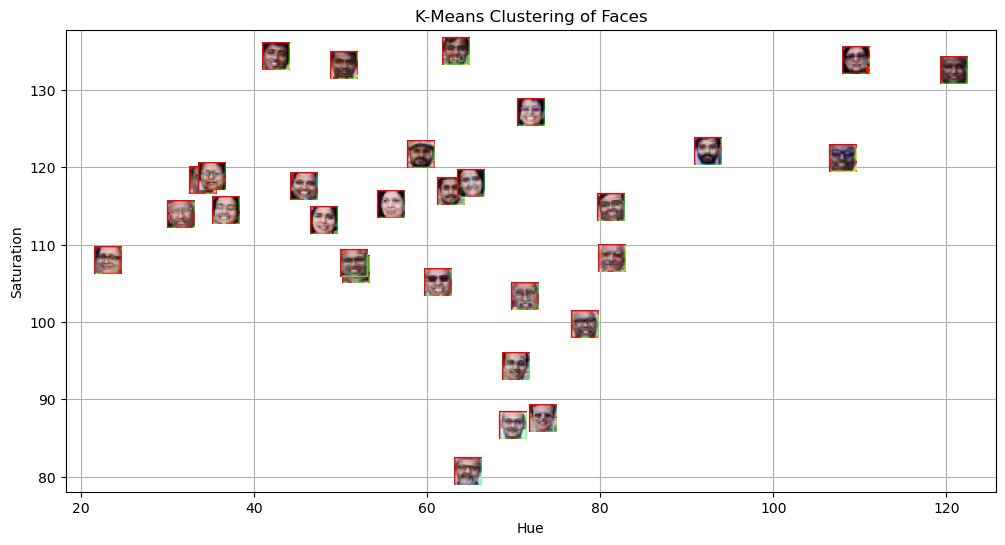

In [4]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV ) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2,random_state=42, n_init=10).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("K-Means Clustering of Faces")
## Put grid
plt.grid(True)
## show the plot
plt.show()

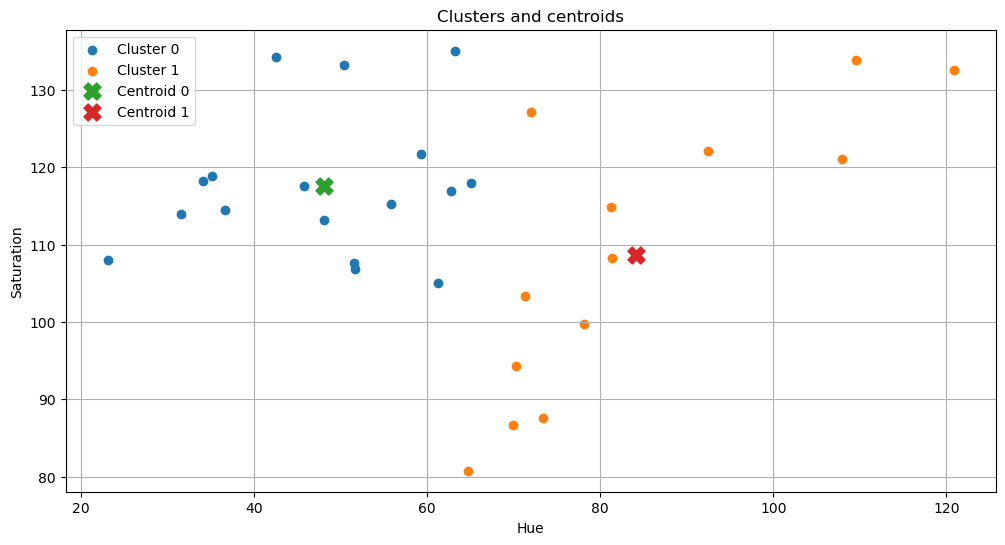

In [5]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0], cluster_0_points[:, 1], label="Cluster 0")


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], label="Cluster 1") 

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], marker="X", s=150, label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], marker="X", s=150, label= "Centroid 1")

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clusters and centroids")
## Add a legend
plt.legend()
## Add grid
plt.grid("TRUE")
## Show the plot
plt.show()

In [6]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("/Users/sana2006/Downloads/Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray= cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray,1.05, 4, minSize=(25, 25), maxSize=(50, 50))
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Detected Face in Template Image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

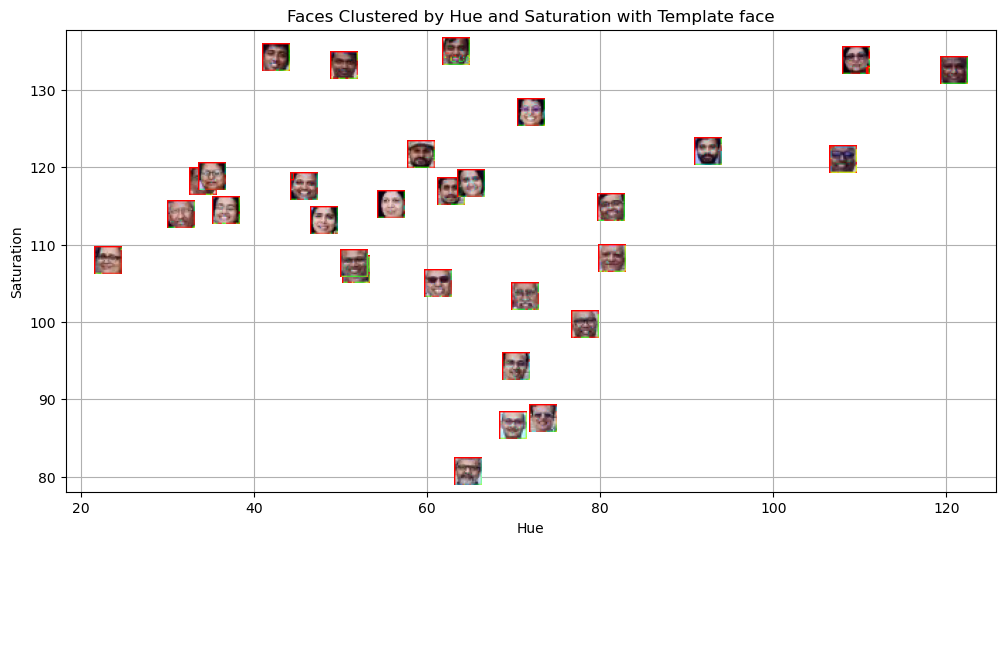

In [8]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:,:,0])
template_saturation = np.mean(template_hsv[:,1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict(np.array([[template_hue, template_saturation]]))[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Faces Clustered by Hue and Saturation with Template face")
## Add grid
plt.grid(True)
## show plot
plt.show()

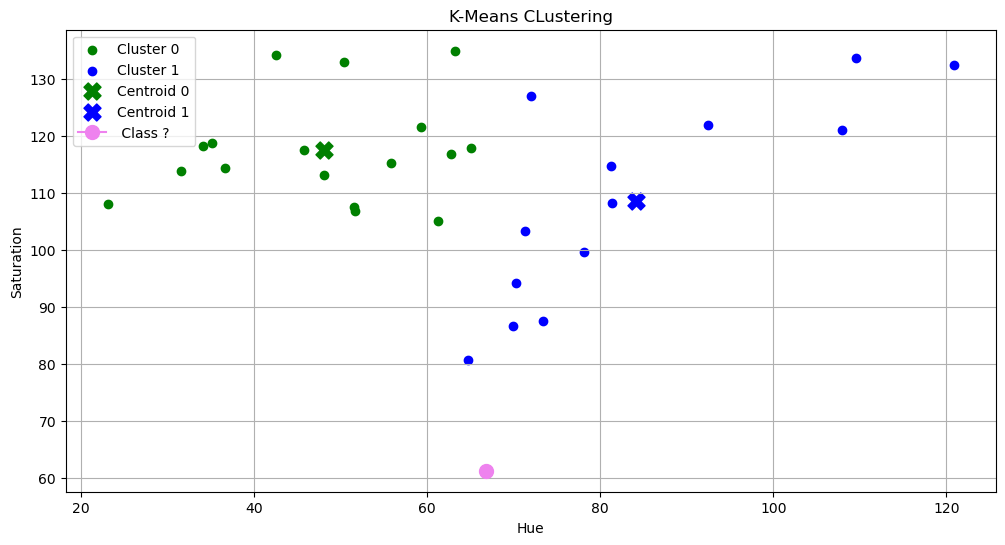

In [11]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], marker='X', c='green', s=150, label= "Centroid 0") ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], marker='X', c='blue', s=150, label="Centroid 1")  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("K-Means CLustering")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## show the plot
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


<b> 1. What are the common distance metrics used in distance-based classification algorithms? </b> 

Answer: Common distance metrics used in distance-based classifications algorithms are

(i) Euclidean distance

(ii) Mahalanobis Distance

(iii) Manhattan distance

(iv) Chebyshev's distance

(v) Minkowski distance: 


<b> 2. What are some real-world applications of distance-based classification algorithms? </b>

(a) Faces or image recognition: Face punch machine in Plaksha University. 
(b) Handwritten digit and character recognisation: postal code recognition or cheque processing. 
(c) Medical diagnosis: k-NN used to classify tumors as benign or malignant. 
(d) Reccomendation systems: product recommendation using distance between user preferences.   
(e) Audio recognition: Speaker identification system 

<b> 3. Explain various distance metrics. </b>

Answer:

(i) Euclidean distance: Represents the shortest distance between 2 points. It is the most widely used method and quite easy to calculate. 

(ii) Mahalanobis Distance: represents the distance between point P and a distribution D. The idea is to measure how many standard deviations p is away from the mean of D. 

(iii) Manhattan distance, also known as Taxicab geometry is distance between 2 points measured along the axes at right angles. It works better for very high dimensional spaces. 

(iv) Chebyshev's distance: Defined as the vector space where distance between vectors is the greatest of their differences along with any coordinate dimensions. Often, it is used in warehouse logistics to calculate time taken. 

(v) Minkowski distance: A generalised distance metric which can be modified by substituing the value of 'p' to calculate distance between 2 points.


<b> 4. What is the role of cross validation in model performance? </b>

Answer: Cross validation helps in assessing a model's true perfromance by reducing bias and variance which prevents overfitting and ensuring good generalisation to unseen data. 

<b> 5. Explain variance and bias in terms of KNN? </b>

Answer: In KNN method, bias and variance are very dependent on value of k. If k is low like k=1, the model has low bias means that it closely follows the training data and captures fine patterns but the variance is high indicating that data is more sensitive to noise which results in overfitting. If vale of k is high, then there is a high bias leading to the model becoming overly smooth and missing important local patterns but the variance is low meaning predictions is more stable and less sensitive to fluctuations causing underfitting.
